<a href="https://colab.research.google.com/github/lookmeebbear/CU_GeoSAM/blob/main/CU_GeoSAM_segmentlidar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Geospatial Segment Anything Model (GeoSAM) : Case Study at Chulalongkorn University (CU_GeoSAM)**

Thepchai Srinoi, Thirawat Bunnakulpipat and Phisan Santitamnont

Department of Survey Engineering Chulalongkorn University


LiDAR Segmentation Wowza ...

Yarroudh, A. (2023). LiDAR Automatic Unsupervised Segmentation using Segment-Anything Model (SAM) from Meta AI [GitHub repository]. Retrieved from https://github.com/Yarroudh/segment-lidar

Install Segment-LiDAR

In [ ]:
!git clone https://github.com/Yarroudh/segment-lidar

Cloning into 'segment-lidar'...
remote: Enumerating objects: 577, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 577 (delta 33), reused 58 (delta 23), pack-reused 505
Receiving objects: 100% (577/577), 15.98 MiB | 32.59 MiB/s, done.
Resolving deltas: 100% (270/270), done.


In [ ]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Aug  4 14:40 .
drwxr-xr-x 1 root root 4096 Aug  4 14:37 ..
drwxr-xr-x 4 root root 4096 Aug  2 13:34 .config
drwxr-xr-x 1 root root 4096 Aug  2 13:34 sample_data
drwxr-xr-x 5 root root 4096 Aug  4 14:40 segment-lidar


In [ ]:
!cp /content/segment-lidar/requirements.txt requirements.txt

In [ ]:
!cp /content/segment-lidar/setup.py setup.py

In [ ]:
!cp /content/segment-lidar/README.md README.md

In [ ]:
!cp -R /content/segment-lidar/segment_lidar /content/segment_lidar

In [ ]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.8 MB/s et

In [ ]:
from segment_lidar import samlidar

In [ ]:
model = samlidar.SamLidar(ckpt_path="sam_vit_h_4b8939.pth")

Checkpoint /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth does not exist.


Downloading...
From: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
To: /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.56G/2.56G [00:11<00:00, 220MB/s]


โหลดของสามอย่าง raster.tif, pointcloud.las และ config.yaml ลูกหมีแอบใส่ไว้ใน google drive ของตนเอง โหลดมาเล่นได้

In [ ]:
!gdown https://drive.google.com/uc?id=1ZhKW8gvMlx0j78dK4j9FPJGH18pFoPH-

Downloading...
From: https://drive.google.com/uc?id=1ZhKW8gvMlx0j78dK4j9FPJGH18pFoPH-
To: /content/20220819120716004.las
100% 170M/170M [00:02<00:00, 79.7MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1-HYF2jcbDVnbZdyuoVeHWiH_bDN8IO7u

Downloading...
From: https://drive.google.com/uc?id=1-HYF2jcbDVnbZdyuoVeHWiH_bDN8IO7u
To: /content/chula.tiff
100% 16.9M/16.9M [00:00<00:00, 72.4MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1_60-j9bWN6XfLoKx54Q4Yj2wb31dd5ID

Downloading...
From: https://drive.google.com/uc?id=1_60-j9bWN6XfLoKx54Q4Yj2wb31dd5ID
To: /content/config.yaml
100% 527/527 [00:00<00:00, 3.71MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1lf9PUA37JdzeNexXKuGFnuEGjuWSGGHG

Downloading...
From: https://drive.google.com/uc?id=1lf9PUA37JdzeNexXKuGFnuEGjuWSGGHG
To: /content/chula_lidar.las
100% 117M/117M [00:00<00:00, 169MB/s]


In [ ]:
points = model.read("chula_lidar.las")

Reading chula_lidar.las...
- Classification value is not provided. Reading all points...
- Reading RGB values...
File reading is completed in 0.26 seconds. The point cloud contains 3241525 points.



without ground filtering

In [ ]:
labels, *_ = model.segment(points=points, image_path="chula.tiff", labels_path="labeled.tiff")

Segmenting the point cloud...
- Generating raster image...
- Saving raster image...
- Applying segment-geospatial to raster image...
- Saving segmented image...
- Generating segment IDs...
Segmentation is completed in 3.13 seconds. Number of instances: 123



In [ ]:
model.write(points=points, segment_ids=labels, save_path="segmented.las")

Writing the segmented point cloud to segmented.las...
Writing is completed in 1.26 seconds.



with ground filtering

In [ ]:
cloud, non_ground, ground = model.csf(points)

Applying CSF algorithm...
CSF algorithm is completed in 30.76 seconds. The filtered non-ground cloud contains 1687159 points.



In [ ]:
labels, *_ = model.segment(points=cloud, image_path="chula.tiff", labels_path="groundfilter_labeled.tif")

Segmenting the point cloud...
- Generating raster image...
- Saving raster image...
- Applying segment-geospatial to raster image...
- Saving segmented image...
- Generating segment IDs...
Segmentation is completed in 10.11 seconds. Number of instances: 111



In [ ]:
model.write(points=points, non_ground=non_ground, ground=ground, segment_ids=labels, save_path="groundfilter_segmented.las")

Writing the segmented point cloud to groundfilter_segmented.las...
Writing is completed in 1.47 seconds.



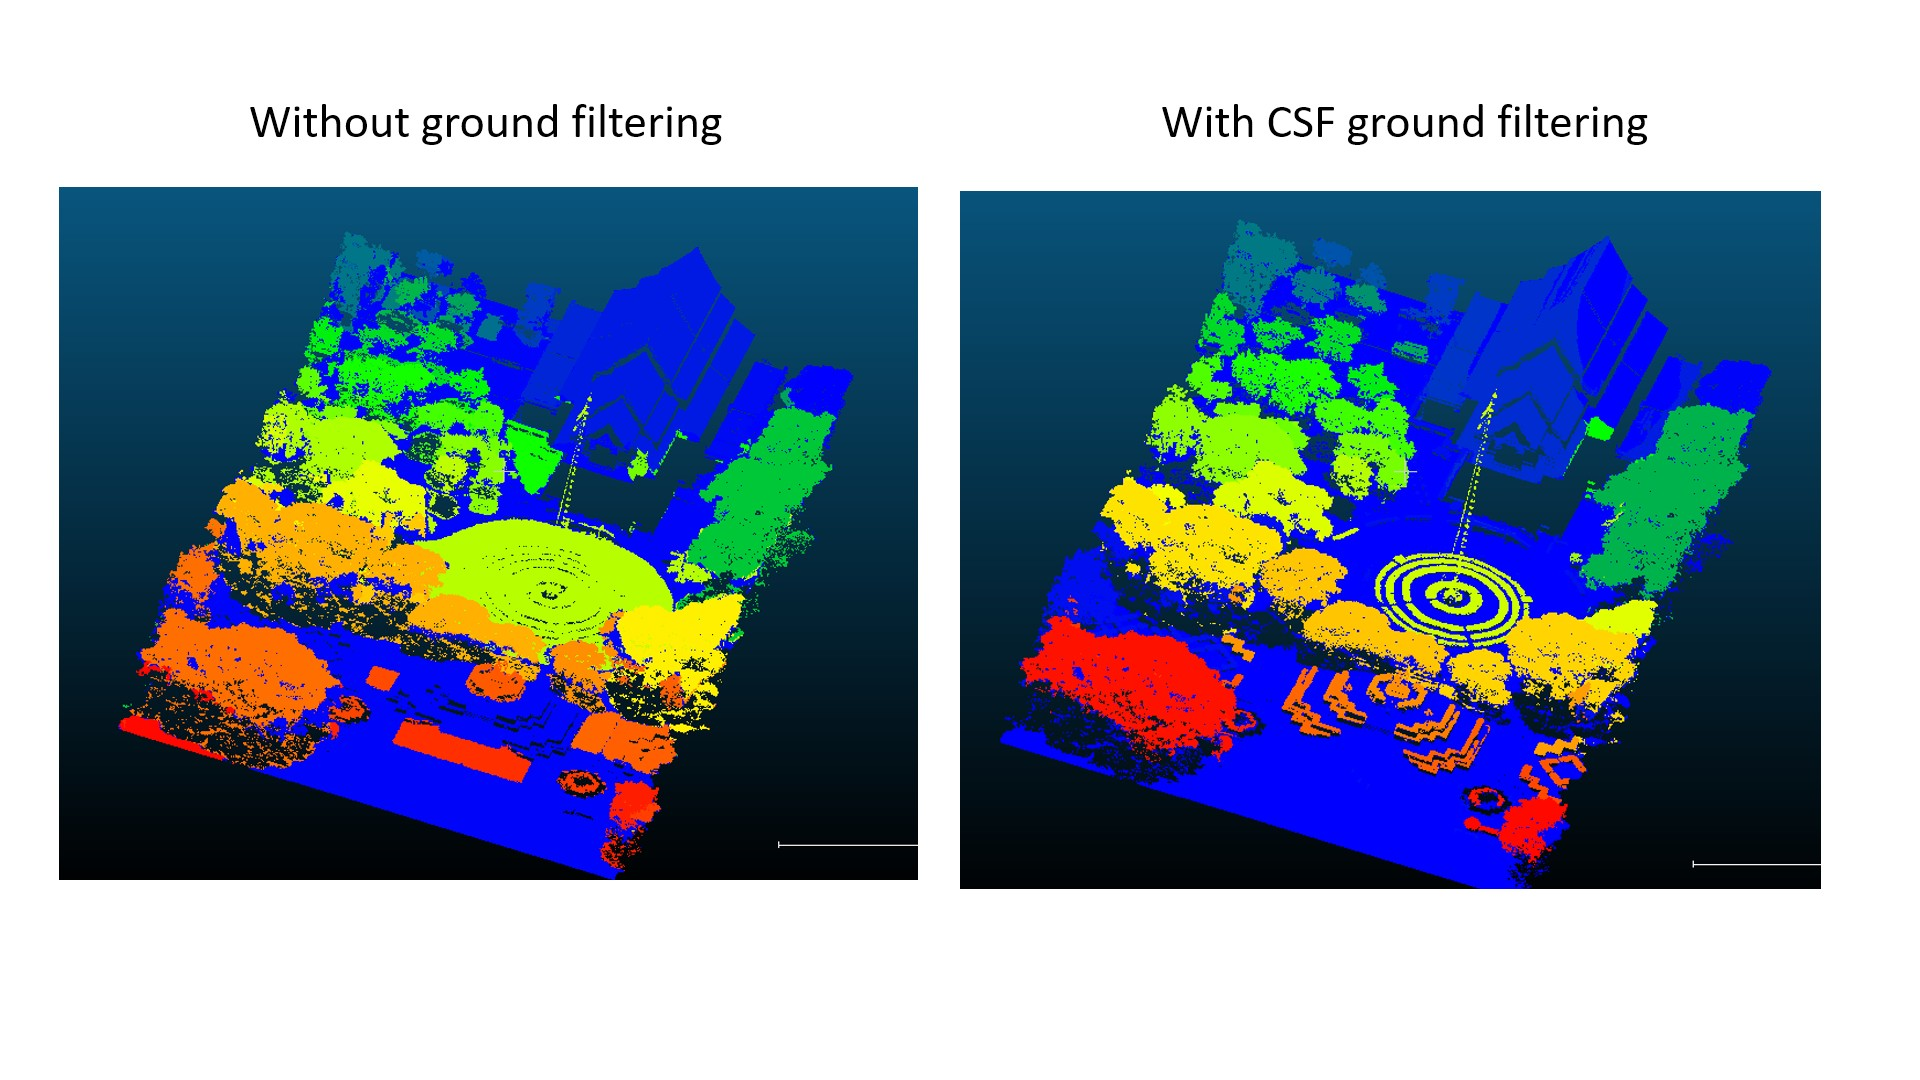

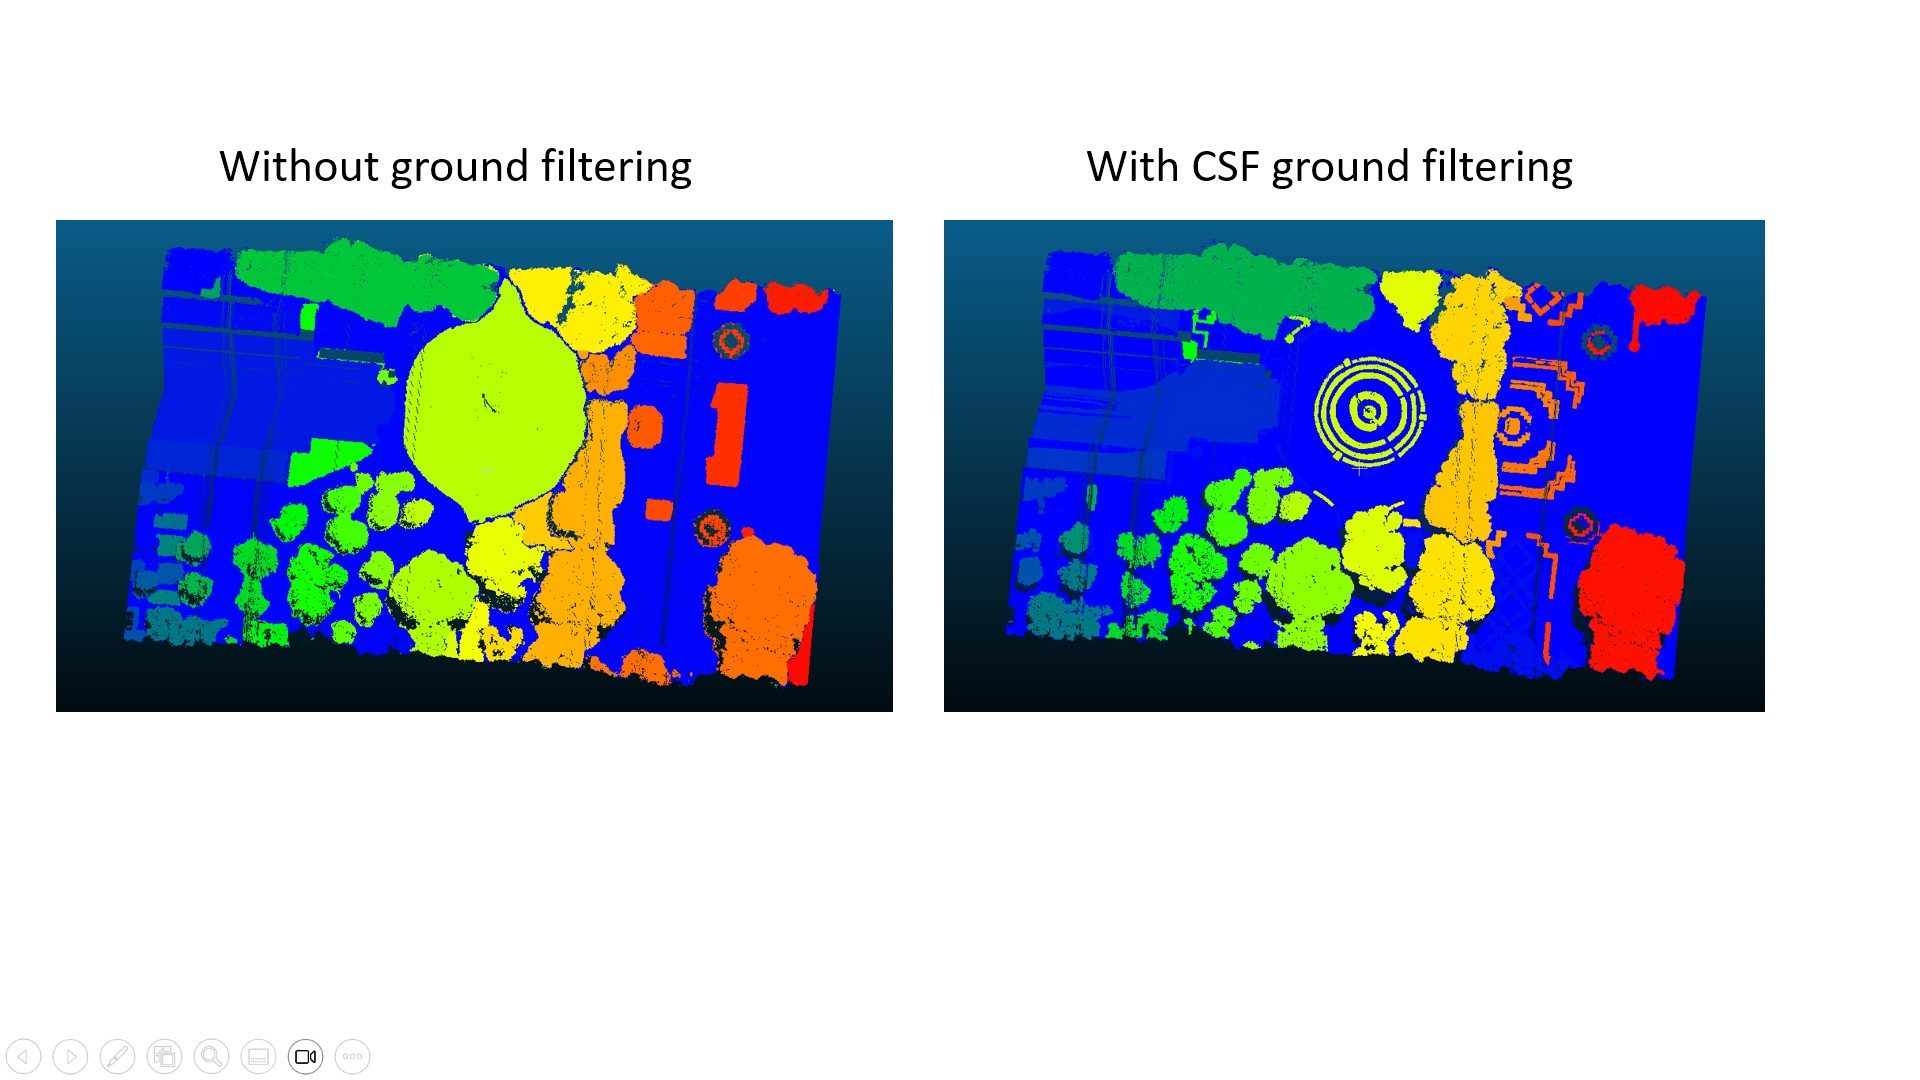

รายละเอียดใน yaml เป็นประมาณนี้

In [ ]:
!cat config3.yaml

algorithm: segment-geospatial
classification: null
device: cuda:0
image_path: chula_lidar_img.tif
input_path: chula_lidar.las
model_path: sam_vit_h_4b8939.pth
model_type: vit_h
output_path: classified3.las
resolution: 0.1
sam_geo:
  automatic: true
  box_threshold: 0.10
  erosion_kernel_size: 3
  sam_kwargs: true
  text_prompt: null
  text_threshold: 0.3
sam_kwargs:
  crop_n_layers: 1
  crop_n_points_downscale_factor: 1
  min_mask_region_area: 10000
  points_per_side: 20
  pred_iou_thresh: 0.8
  stability_score_thresh: 0.92


add config2.yaml, chula_lidar_img.tiff were downloaded from local computer... chula_lidar.las was put from google drive

คำสั่งรัน segment point cloud ลอง resolution:0.10 รัน 66.55 seconds

In [ ]:
!segment-lidar segment --config config3.yaml

Point cloud segmentation completed in 68.87 seconds.


The resulted point cloud contains a new scalar field called segment_id.

We can open this LiDAR from CloudCompare software.